In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


In [12]:

def bilinear_interpolation(x, y, g00, g10, g01, g11):
    """
    Bilinear interpolation between four points.
    """
    x1 = g00 * (1 - x) + g10 * x
    x2 = g01 * (1 - x) + g11 * x
    return x1 * (1 - y) + x2 * y

def bicubic_interpolation(x, y, g00, g10, g01, g11):
    """
    Bicubic interpolation between four points using the S-curve function s(x) = -2x^3 + 3x^2.
    """
    def s(x):
        return -2 * x**3 + 3 * x**2

    x1 = g00 * (1 - s(x)) + g10 * s(x)
    x2 = g01 * (1 - s(x)) + g11 * s(x)
    return x1 * (1 - s(y)) + x2 * s(y)

def generate_random_terrain(size, scale, interpolation='bilinear'):
    """
    Generate a random terrain heightmap using interpolated noise.
    
    Args:
        size (int): Size of the terrain heightmap.
        scale (int): Scale factor for the random lattice.
        interpolation (str): Type of interpolation ('bilinear' or 'bicubic').
    
    Returns:
        numpy.ndarray: Terrain heightmap.
    """
    bl_terrain = np.zeros((size, size))
    bc_terrain = np.zeros((size, size))
    coarse_size = size // scale
    
    # Generate random lattice
    coarse_terrain = np.random.rand(coarse_size, coarse_size)
    
    # Interpolate between lattice points
    for i in range(coarse_size):
        for j in range(coarse_size):
            i0 = i * scale
            i1 = (i + 1) * scale
            j0 = j * scale
            j1 = (j + 1) * scale
            
            g00 = coarse_terrain[i, j]
            g10 = coarse_terrain[i + 1, j] if i + 1 < coarse_size else coarse_terrain[0, j]
            g01 = coarse_terrain[i, j + 1] if j + 1 < coarse_size else coarse_terrain[i, 0]
            g11 = coarse_terrain[i + 1, j + 1] if i + 1 < coarse_size and j + 1 < coarse_size else coarse_terrain[0, 0]
            
            for x in range(i0, i1):
                for y in range(j0, j1):
                    x_ratio = (x - i0) / scale
                    y_ratio = (y - j0) / scale
                    
                    bl_terrain[x, y] = bilinear_interpolation(x_ratio, y_ratio, g00, g10, g01, g11)
                    bc_terrain[x, y] = bicubic_interpolation(x_ratio, y_ratio, g00, g10, g01, g11)
    
    return bl_terrain, bc_terrain

In [21]:
# Generate a 256x256 terrain heightmap with a scale factor of 8 using bilinear interpolation
terrain_bl, terrain_bq = generate_random_terrain(128, 16)


In [22]:


def visualize_terrain(terrain, cmap='terrain'):
    """
    Visualize the terrain heightmap using matplotlib.
    
    Args:
        terrain (numpy.ndarray): Terrain heightmap.
        cmap (str, optional): Colormap to use for visualization. Default is 'terrain'.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(terrain, cmap=cmap, vmin=0, vmax=1)
    ax.set_title('Random Terrain')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(im, ax=ax)
    plt.show()


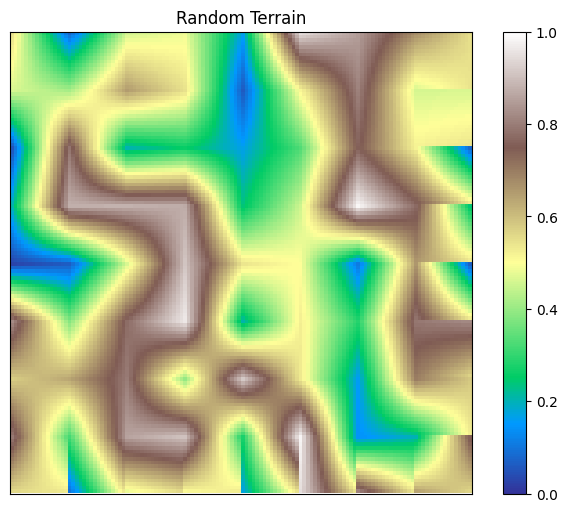

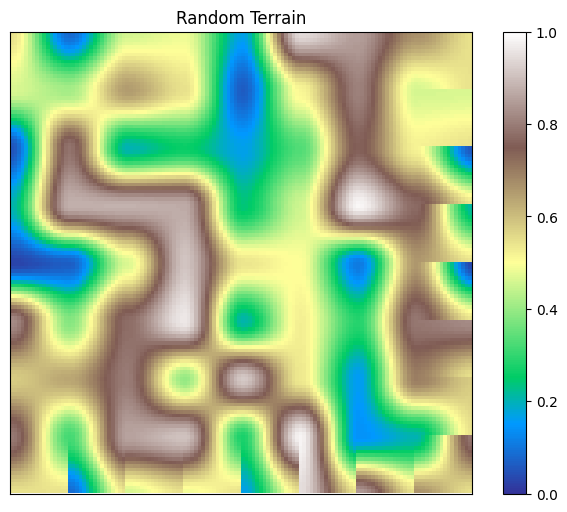

In [23]:
visualize_terrain(terrain_bl)
visualize_terrain(terrain_bq)

In [24]:

def visualize_3d_terrain(terrain, cmap='terrain', elev=45, azim=45):
    """
    Visualize the terrain heightmap in 3D using matplotlib.
    
    Args:
        terrain (numpy.ndarray): Terrain heightmap.
        cmap (str, optional): Colormap to use for visualization. Default is 'terrain'.
        elev (float, optional): Elevation angle for the 3D view. Default is 45 degrees.
        azim (float, optional): Azimuth angle for the 3D view. Default is 45 degrees.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(terrain.shape[0])
    y = np.arange(terrain.shape[1])
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, terrain, cmap=cmap, rstride=1, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Elevation')
    ax.view_init(elev=elev, azim=azim)
    plt.show()


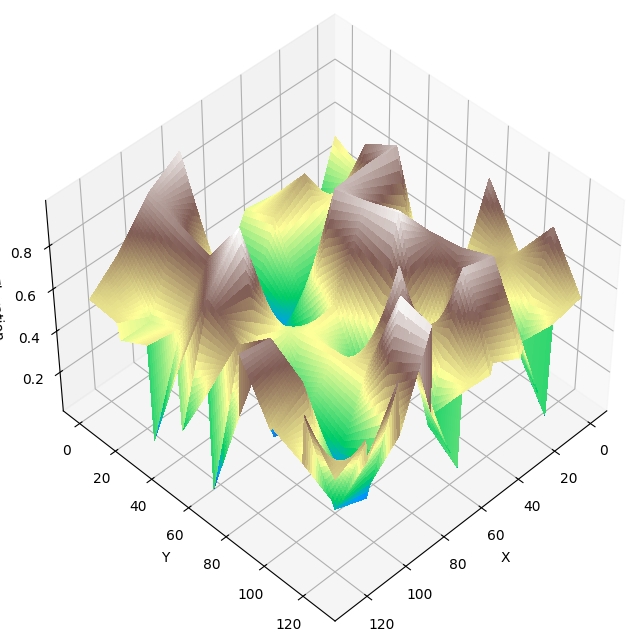

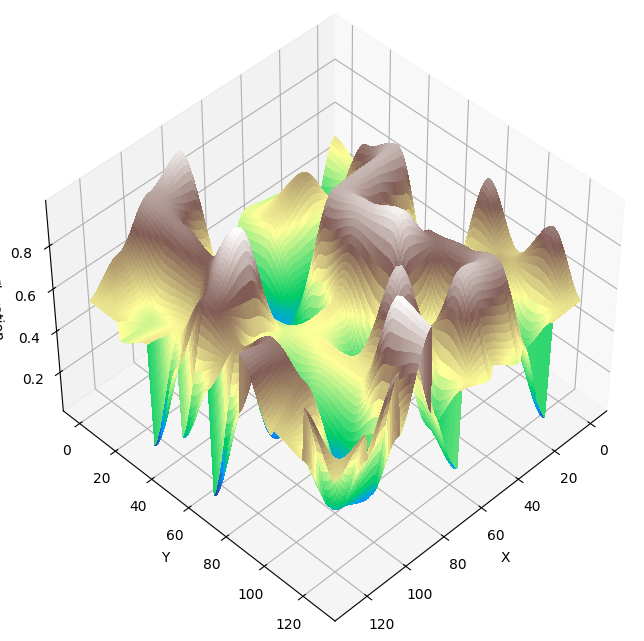

In [25]:
visualize_3d_terrain(terrain_bl, cmap='terrain', elev=45, azim=45)
visualize_3d_terrain(terrain_bq, cmap='terrain', elev=45, azim=45)